In [ ]:
!pip install tensorflow --upgrade

!pip install tensorflow keras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 125.7 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.19.0
    Uninstalling tensorboard-2.19.0:
      Successfully uninstalled tensorboard-2.19.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.19.0
    Uninstalling tensorflow-2.19.0:
      Successfully uninstalled tensorflow-2.19.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.19.0 requires tensorflow<2.20,>=2.19, but you have tensorflow 2.20.0 which is incompatible.
tensorflow-text 2.19.0 requires tensorflow<2.20,>=2.19.0, but you have tensorflow 2.20.0 which is incompatible.
tensorflow-decision-forests 1.12.0 requires tensorflow==2.19.0, but you have tensorflow 2.20.0 which is in

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [ ]:
# Google Colab에서 데이터셋 다운로드를 위한 Kaggle API 설정
# Kaggle에서 제공하는 Dogs vs Cats 데이터셋 다운로드 설정
!pip install -q kaggle

# Kaggle API 키를 Colab에 업로드
from google.colab import files
files.upload()  # 여기서 kaggle.json 파일을 업로드함


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"seokhj","key":"b9a13b35e7d4ce452597e6365f428068"}'}

In [ ]:
# Kaggle API 설정: kaggle.json 파일을 Colab 환경에서 사용할 수 있도록 설정
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
# 이 명령어는 특정 데이터셋 페이지에서 데이터를 다운로드하며,
# Kaggle 경진대회와는 별개로 제공되는 데이터셋에서 데이터를 받을 수 있음

!kaggle datasets download -d tongpython/cat-and-dog


Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
 58% 127M/218M [00:00<00:00, 1.33GB/s]
100% 218M/218M [00:00<00:00, 852MB/s] 


In [ ]:
!unzip -o cat-and-dog.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: training_set/training_set/cats/cat.3704.jpg  
  inflating: training_set/training_set/cats/cat.3705.jpg  
  inflating: training_set/training_set/cats/cat.3706.jpg  
  inflating: training_set/training_set/cats/cat.3707.jpg  
  inflating: training_set/training_set/cats/cat.3708.jpg  
  inflating: training_set/training_set/cats/cat.3709.jpg  
  inflating: training_set/training_set/cats/cat.371.jpg  
  inflating: training_set/training_set/cats/cat.3710.jpg  
  inflating: training_set/training_set/cats/cat.3711.jpg  
  inflating: training_set/training_set/cats/cat.3712.jpg  
  inflating: training_set/training_set/cats/cat.3713.jpg  
  inflating: training_set/training_set/cats/cat.3714.jpg  
  inflating: training_set/training_set/cats/cat.3715.jpg  
  inflating: training_set/training_set/cats/cat.3716.jpg  
  inflating: training_set/training_set/cats/cat.3717.jpg  
  inflating: training_set/training_set/cats/cat.3718.jpg  
  inflating: training

In [ ]:
# 중복된 폴더 정리
!mv training_set/training_set/* training_set/
!mv test_set/test_set/* test_set/

# 빈 중첩 폴더 삭제
!rm -r training_set/training_set
!rm -r test_set/test_set

In [ ]:
!ls training_set
!ls test_set

cats  dogs
cats  dogs


In [ ]:
!ls training_set/cats
!ls training_set/dogs
!ls test_set/cats
!ls test_set/dogs

cat.1000.jpg  cat.1722.jpg  cat.2443.jpg  cat.3164.jpg	cat.3886.jpg
cat.1001.jpg  cat.1723.jpg  cat.2444.jpg  cat.3165.jpg	cat.3887.jpg
cat.1002.jpg  cat.1724.jpg  cat.2445.jpg  cat.3166.jpg	cat.3888.jpg
cat.1003.jpg  cat.1725.jpg  cat.2446.jpg  cat.3167.jpg	cat.3889.jpg
cat.1004.jpg  cat.1726.jpg  cat.2447.jpg  cat.3168.jpg	cat.388.jpg
cat.1005.jpg  cat.1727.jpg  cat.2448.jpg  cat.3169.jpg	cat.3890.jpg
cat.1006.jpg  cat.1728.jpg  cat.2449.jpg  cat.316.jpg	cat.3891.jpg
cat.1007.jpg  cat.1729.jpg  cat.244.jpg   cat.3170.jpg	cat.3892.jpg
cat.1008.jpg  cat.172.jpg   cat.2450.jpg  cat.3171.jpg	cat.3893.jpg
cat.1009.jpg  cat.1730.jpg  cat.2451.jpg  cat.3172.jpg	cat.3894.jpg
cat.100.jpg   cat.1731.jpg  cat.2452.jpg  cat.3173.jpg	cat.3895.jpg
cat.1010.jpg  cat.1732.jpg  cat.2453.jpg  cat.3174.jpg	cat.3896.jpg
cat.1011.jpg  cat.1733.jpg  cat.2454.jpg  cat.3175.jpg	cat.3897.jpg
cat.1012.jpg  cat.1734.jpg  cat.2455.jpg  cat.3176.jpg	cat.3898.jpg
cat.1013.jpg  cat.1735.jpg  cat.2456.jpg  cat.3177

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 훈련용 데이터 증강
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# 검증용 데이터는 증강하지 않고 스케일링만 적용
test_datagen = ImageDataGenerator(rescale=1./255)

# 훈련용 데이터 로드
train_generator = train_datagen.flow_from_directory(
    'training_set',           # 훈련 데이터 경로
    target_size=(150, 150),   # 이미지 크기
    batch_size=32,
    class_mode='binary'       # 이진 분류
)

# 검증용 데이터 로드
validation_generator = test_datagen.flow_from_directory(
    'test_set',               # 검증 데이터 경로
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'       # 이진 분류
)

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [ ]:
# 위에서 준비한 데이터셋 가지고 VGG16 전이학습 진행

from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential

# VGG16 모델 로드 (사전 학습된 가중치 사용, fully connected layer 제외)
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# 기존 가중치 고정
vgg_base.trainable = False

# 새로운 모델 정의
model = Sequential([
    vgg_base,                 # 사전 학습된 VGG16 모델 (고정된 가중치 사용)
    Flatten(),                # fully connected layer 전에 다차원 배열을 1차원으로 펼침
    Dense(256, activation='relu'),  # 256개의 뉴런(neurons)을 가진 은닉층, 활성화 함수로 ReLU 사용
    Dense(1, activation='sigmoid')  # 1개의 출력 뉴런을 가진 출력층 (이진 분류), sigmoid 활성화 함수 사용
])


# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 모델 학습
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // 32
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 76s 270ms/step - accuracy: 0.7629 - loss: 0.5122 - val_accuracy: 0.8884 - val_loss: 0.2710
Epoch 2/10
  1/250 ━━━━━━━━━━━━━━━━━━━━ 21s 87ms/step - accuracy: 0.9688 - loss: 0.1745

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - accuracy: 0.9688 - loss: 0.1745 - val_accuracy: 0.8874 - val_loss: 0.2703
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 82s 329ms/step - accuracy: 0.8447 - loss: 0.3471 - val_accuracy: 0.8854 - val_loss: 0.2623
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.7500 - loss: 0.4145 - val_accuracy: 0.8884 - val_loss: 0.2646
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 82s 330ms/step - accuracy: 0.8376 - loss: 0.3419 - val_accuracy: 0.9008 - val_loss: 0.2341
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.8750 - loss: 0.2841 - val_accuracy: 0.8973 - val_loss: 0.2355
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 64s 255ms/step - accuracy: 0.8604 - loss: 0.3183 - val_accuracy: 0.8884 - val_loss: 0.2431
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - accuracy: 0.7812 - loss: 0.3364 - val_accuracy: 0.8948 - val_loss: 0.2422
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 82s 296ms/step - accuracy: 0.8592 - loss: 0.3150 - val_accur

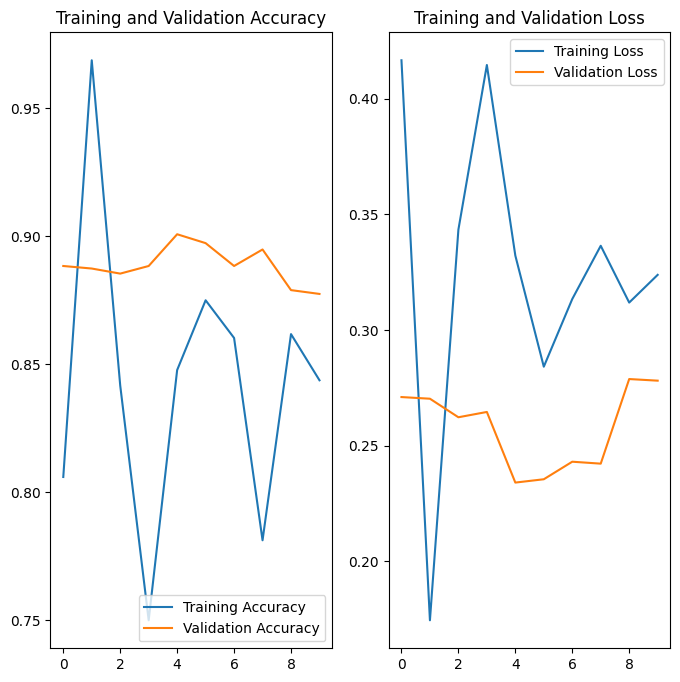

In [ ]:
import matplotlib.pyplot as plt

# 학습 및 검증 정확도 시각화
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# 모델 개선을 위한 추가학습

from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

# VGG16 불러오기
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# convolutional base는 고정
for layer in vgg_base.layers:
    layer.trainable = False

# 개선된 모델 정의 (Dropout + 학습률 조정)
improved_model = Sequential([
    vgg_base,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),  # 과적합 방지용 Dropout
    Dense(1, activation='sigmoid')
])

# Adam 학습률 조정
improved_model.compile(optimizer=Adam(learning_rate=1e-4),
                       loss='binary_crossentropy',
                       metrics=['accuracy'])

# EarlyStopping 콜백 (검증 손실 3 epoch 연속 개선 없으면 멈춤)
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# 모델 학습
history_improved = improved_model.fit(
    train_generator,
    epochs=15,   # Epoch 늘림
    validation_data=validation_generator,
    callbacks=[early_stop]
)

Epoch 1/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 74s 275ms/step - accuracy: 0.7073 - loss: 0.5470 - val_accuracy: 0.8764 - val_loss: 0.2973
Epoch 2/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 64s 255ms/step - accuracy: 0.8186 - loss: 0.3905 - val_accuracy: 0.8903 - val_loss: 0.2684
Epoch 3/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 82s 256ms/step - accuracy: 0.8454 - loss: 0.3479 - val_accuracy: 0.8838 - val_loss: 0.2641
Epoch 4/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 64s 255ms/step - accuracy: 0.8467 - loss: 0.3350 - val_accuracy: 0.8903 - val_loss: 0.2674
Epoch 5/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 68s 269ms/step - accuracy: 0.8502 - loss: 0.3314 - val_accuracy: 0.8942 - val_loss: 0.2584
Epoch 6/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 68s 269ms/step - accuracy: 0.8500 - loss: 0.3383 - val_accuracy: 0.8987 - val_loss: 0.2411
Epoch 7/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 68s 269ms/step - accuracy: 0.8562 - loss: 0.3229 - val_accuracy: 0.9006 - val_loss: 0.2413
Epoch 8/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 64s 254ms/step - accuracy: 0.8669 - loss: 0

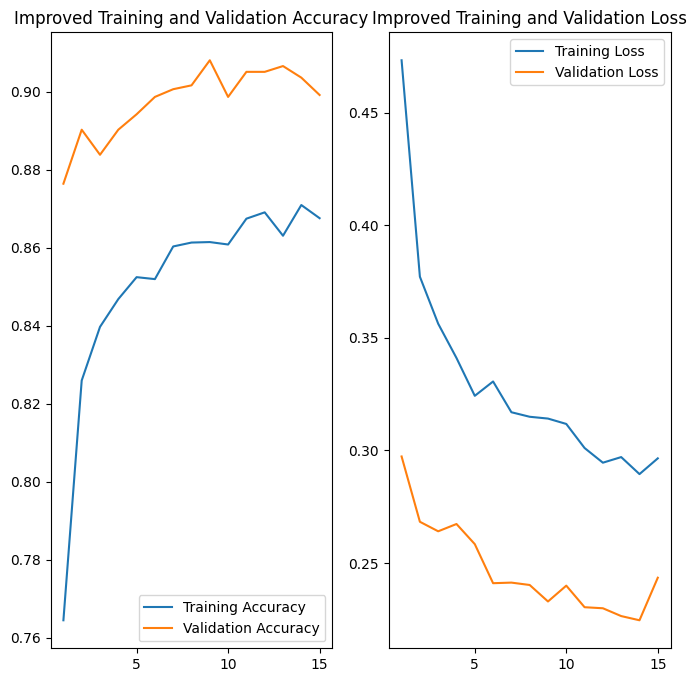

In [ ]:
# 학습 결과 시각화
acc = history_improved.history['accuracy']
val_acc = history_improved.history['val_accuracy']
loss = history_improved.history['loss']
val_loss = history_improved.history['val_loss']
epochs_range = range(1, len(acc) + 1)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Improved Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Improved Training and Validation Loss')
plt.show()